## Цель проекта:

    - Провести разведывательный анализ данных студентов в возрасте от 15 до 22х лет, в результате которого построить модель для отслеживания влияния условий жизни учащихся на успеваемость по математике. С целью на ранней стадии виявить студентов находящихся в группе риска.

## Задачи проекта:

    - потренироваться проводить разведывательный анализ данных, научиться выдвигать гипотезы, выявить очевидные и неочевидные закономерности


## Этапы работы:

    - Проанализировать каждый столбец данной таблицы
    - Очистить и подготовить данные
    - Составить промежуточные выводы
    - Определить параметры модели
    - Выдвинуть гипотезы
    - Представить модель
    - Составить отчёт по результатам модели

### 1. Первичная обработка данных: 

Импортируем нужные для чтения и первичного анализа библиотеки и прочитаем файл:

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import warnings 
warnings.filterwarnings('ignore')

In [20]:
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

students = pd.read_csv('stud_math.xls')

#Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:
display(students.head(10))
students.info() 
students[students.duplicated(keep='last')]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score


### Анализ пустых значений

In [21]:
students.isna().sum().sort_values()

school                  0
sex                     0
age                     0
Medu                    3
score                   6
studytime, granular     7
studytime               7
goout                   8
schoolsup               9
freetime               11
absences               12
activities             14
health                 15
nursery                16
address                17
reason                 17
Mjob                   19
higher                 20
failures               22
Fedu                   24
famrel                 27
famsize                27
traveltime             28
guardian               31
romantic               31
internet               34
Fjob                   36
famsup                 39
paid                   40
Pstatus                45
dtype: int64

Описание столбцов:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 studytime, granular - ?! _нет описания в рекомендациях в курсе_ ?!

22 higher — хочет получить высшее образование (yes или no)

23 internet — наличие интернета дома (yes или no)

24 romantic — в романтических отношениях (yes или no)

25 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

26 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

27 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

28 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

29 absences — количество пропущенных занятий

30 score — баллы по госэкзамену по математике

# Промежуточные выводы:

- 395 не дублирующихся записей в дата сете, 
- общее кол-во столбцов 30 (13 - числовых и 17 - строковых),
- почти в каждом столбце есть пустые значения, необходима коррекция и/или очистка,
- 21й studytime, granular столбец не объяснён в курсе, возможно его прийдёться удалить так как не понятен его смысл


### Для удобства использования pandas переименуем все столбцы:

In [22]:
students.columns = ['school_name', 'gender', 'age', 'address', 'family_size', 'married_status', 'mother_edu', 
                    'father_edu', 'mother_job','father_job','reason', 'guardian', 'travel_time', 'study_time', 
                    'failures', 'add_sch_support','family_support','paid','add_school_activities','kinder_garden',
                    'granular','wish_high_edu', 'internet','romantic','family_relations','free_time',
                    'go_out','health','absences','score']

### Функции:

### Для анализа номинативных признаков по отношению к _score_ :

In [23]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x = column, y = 'score', data = students)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

### Функция для поиска наиболее встречаемых значений полей в зависимости от значения _score_ :

In [24]:
def get_freq_values(column_name,score,if_nan_value):
    if students[(students.score == score)][column_name].value_counts().index[0] == 'nan':
        return if_nan_value
    else: return students[(students.score == score)][column_name].value_counts().index[0]


# 2. Теперь рассмотрим все 30 столбцов по отдельности:

## 2.0. score - баллы по госэкзамену (0-100):

- числовой признак

Вынуждена поставить этот столбец с самого начала изза что того каждый последующий столбец анализируем на взаимосвязь со score. Поэтому есть необходимость почистить его в первую очередь.

### Узнаем количестко повторяющихся значений предварительно преобразовав значения None в пустую строку "":

In [25]:
students.score = students.score.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(students.score.value_counts().sort_index(ascending=True))

,score
0.0,37
100.0,1
20.0,1
25.0,7
30.0,15
35.0,9
40.0,31
45.0,27
50.0,54
55.0,46


### Шесть пустых значений. Просмотрим детальнее на все шесть записей:

In [26]:
students[students.score == 'nan']

,school_name,gender,age,address,family_size,married_status,mother_edu,father_edu,mother_job,father_job,reason,guardian,travel_time,study_time,failures,add_sch_support,family_support,paid,add_school_activities,kinder_garden,granular,wish_high_edu,internet,romantic,family_relations,free_time,go_out,health,absences,score
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,NaN,yes,yes,-6.0,yes,no,no,4.0,NaN,3.0,4.0,6.0,nan
244,GP,F,18,U,GT3,T,2.0,1.0,other,other,course,other,2.0,3.0,0.0,no,yes,yes,no,no,-9.0,yes,yes,yes,4.0,4.0,4.0,3.0,0.0,nan
270,GP,F,19,NaN,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,3.0,5.0,5.0,NaN,nan
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,NaN,no,yes,yes,-6.0,yes,yes,no,5.0,NaN,4.0,4.0,4.0,nan
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,-6.0,yes,yes,no,4.0,5.0,NaN,4.0,3.0,nan
350,MS,M,19,NaN,GT3,T,1.0,1.0,other,services,home,other,3.0,2.0,3.0,no,no,no,no,NaN,-6.0,yes,yes,no,5.0,4.0,4.0,2.0,8.0,nan


### Чётких объяснений пока не вижу от чего записи пропущены. Но так как анализировать необходимо, и эти пустые значения мешают, я пока их удалю.

In [27]:
students.drop(students[students.score == 'nan'].index, inplace=True)

### Преобразуем количество баллов к числовому формату:

In [28]:
students.score = students.score.astype(float).apply(lambda x:int(x))
pd.DataFrame(students.score.value_counts().sort_index(ascending=True))

,score
0,37
20,1
25,7
30,15
35,9
40,31
45,27
50,54
55,46
60,31


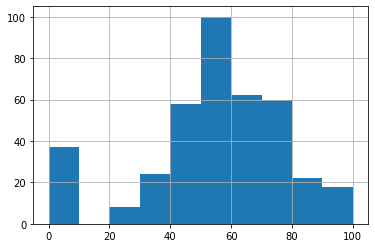

In [29]:
students.score.hist()

### Как видно из гистограммы нулевые значениями выпадают из распределения признака. Посмотрим на эти 37мь нулевых значений:

In [30]:
students.loc[students.score == 0]

,school_name,gender,age,address,family_size,married_status,mother_edu,father_edu,mother_job,father_job,reason,guardian,travel_time,study_time,failures,add_sch_support,family_support,paid,add_school_activities,kinder_garden,granular,wish_high_edu,internet,romantic,family_relations,free_time,go_out,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,NaN,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,course,mother,3.0,2.0,0.0,no,no,NaN,no,yes,-6.0,yes,no,no,NaN,4.0,5.0,5.0,0.0,0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,NaN,no,no,yes,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0


Только одно наглядное объяснение нулевым значениеям - отсутствие дополнительной поддержки в школе (add_sch_support = 'no' у 36 из 37 учеников)

In [31]:
pd.DataFrame(students.loc[(students.score == 0) & (students.add_sch_support == 'no')].add_sch_support.value_counts())

,add_sch_support
no,36


## Промежуточные выводы:

- по моему предварительному и скромному суждению нулевые значения прийдётся удалить.

## 2.1. school_name - GP или MS:

- нечисловой признак

In [32]:
pd.DataFrame(students.school_name.value_counts())

,school_name
GP,344
MS,45


## Промежуточные выводы:

- только две школы участвуют в исследовании, 
- возможно влияние школы на основной признак score, проверим гипотезу

In [33]:
students.groupby(['school_name'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
school_name,,,,,,,,
GP,344.0,52.630814,23.116772,0.0,40.0,55.0,70.0,100.0
MS,45.0,49.444444,21.379212,0.0,40.0,50.0,65.0,95.0


In [34]:
52.63-49.44

3.190000000000005

## Гипотезы: 
Как видим средняя оценка по 'GP' школе на 3.19 балла выше чем 'MS'.
Нам предстоит проверить влиение только ли школы на основной показатель score. 
Возможно что в одной из школ учаться дети родителей чей уровень образования ниже (как пример).
И меньший разброс в школе 'MS' и максимальное значение 95 говорят что оценки по математике чуть слабее чем в 'GP'.

## 2.2 gender - F (female), M (male):
- нечисловой признак

In [35]:
pd.DataFrame(students.gender.value_counts())

,gender
F,204
M,185


In [36]:
students.groupby(['gender'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,204.0,50.098039,23.070682,0.0,40.0,55.0,65.0,95.0
M,185.0,54.648649,22.572608,0.0,45.0,55.0,70.0,100.0


## Промежуточные выводы:

- девочек больше чем мальчиков, 
- оценка по математике у мальчиков выше чем у девочек

## 2.3 age - от 15ти до 22х:
    - числовой признак

In [37]:
pd.DataFrame(students.age.value_counts())

,age
16,103
17,98
15,82
18,80
19,21
20,3
22,1
21,1


### Нет пустых значений, есть 8 возрастных групп, для их анализа лучше всего подойдёт корреляционный график
Найдём коеффициент корреляции:

In [38]:
np.corrcoef(students.age, students.score)

array([[ 1.        , -0.15572626],
       [-0.15572626,  1.        ]])

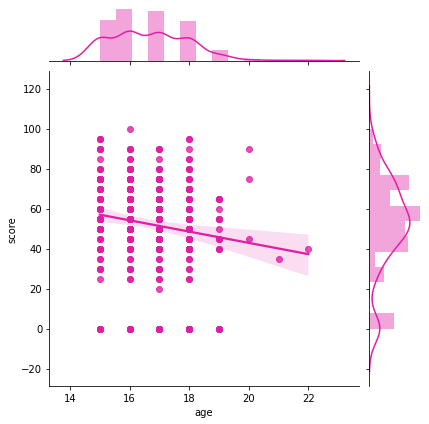

In [39]:
sns.jointplot(x='age', y='score', data=students, kind='reg', color='#E01EA5')

## Промежуточные выводы:

- отрицателькое значение корреляции говорит о том что с возрастом успеваемость по математике снижается
- после 19ти лет данных очень мало и оценки очень низкие, возможно выбросы
- есть почти в каждой возрастной группе значения с оценкой 0, возможно будущие второгодники

## 2.4 address - 'U' - городской, 'R' - за городом:

    - не числовой признак

In [40]:
students.address = students.address.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(students.address.value_counts())

,address
U,291
R,83
nan,15


In [41]:
students.groupby(['address'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
address,,,,,,,,
R,83.0,46.927711,23.148926,0.0,35.0,50.0,60.0,95.0
U,291.0,53.573883,22.824908,0.0,45.0,55.0,70.0,100.0
nan,15.0,56.333333,20.130526,0.0,52.5,60.0,70.0,80.0


## Промежуточные выводы:

- есть 15 пустых значений но негативного влияния на оценки по математике отсутствие адреса не имеет
- похожие выводы как со школой, в городе студенты успешней по математике
- возможно влияние города на основной признак score

In [42]:
students[students.address == 'nan']

,school_name,gender,age,address,family_size,married_status,mother_edu,father_edu,mother_job,father_job,reason,guardian,travel_time,study_time,failures,add_sch_support,family_support,paid,add_school_activities,kinder_garden,granular,wish_high_edu,internet,romantic,family_relations,free_time,go_out,health,absences,score
6,GP,M,16,nan,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55
52,GP,M,15,nan,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,-3.0,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50
75,GP,M,15,nan,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50
92,GP,F,16,nan,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,3.0,3.0,NaN,2.0,4.0,30
96,GP,M,16,nan,GT3,NaN,4.0,3.0,services,other,reputation,mother,2.0,1.0,0.0,yes,yes,NaN,yes,no,-3.0,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75
159,GP,M,16,nan,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60
168,GP,F,16,nan,GT3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,no,-6.0,yes,yes,no,5.0,1.0,5.0,4.0,0.0,0
241,GP,M,17,nan,LE3,A,4.0,4.0,teacher,other,course,mother,NaN,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,3.0,3.0,NaN,4.0,2.0,60
254,GP,M,17,nan,NaN,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60
292,GP,F,18,nan,LE3,T,2.0,1.0,services,at_home,reputation,mother,1.0,2.0,1.0,no,NaN,no,no,yes,-6.0,yes,yes,yes,5.0,4.0,3.0,5.0,12.0,65


#### Чем заполнить пустые значения? Можно сгрупировать значения оценки по математике и поочерёдно найти наиболее часто встречаемое значение адреса для этой оценки. Во всех случаях чаще будет встречаться значение U. Поэтому заполняем пустые значения городским адресом.

In [66]:
for each1 in students[students.address == 'nan'].score:
    print(students[students.score == each1 ]['address'].describe().top)

U
U
U
U
U
U
U
U
U
U
U
U
U
U
U


In [68]:
students[students.address == 'nan'].index

Int64Index([6, 52, 75, 92, 96, 159, 168, 241, 254, 292, 348, 354, 359, 372,
            376],
           dtype='int64')

In [69]:
for each in students[students.address == 'nan'].index:
    students.address.loc[each]='U'

In [70]:
students.groupby(['address'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
address,,,,,,,,
R,83.0,46.927711,23.148926,0.0,35.0,50.0,60.0,95.0
U,306.0,53.709150,22.678445,0.0,45.0,55.0,70.0,100.0


## 2.5 family_size - ('LE3' <= 3, 'GT3' >3):

    - не числовой признак

In [71]:
students.family_size = students.family_size.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(students.family_size.value_counts())

,family_size
GT3,255
LE3,107
nan,27


In [214]:
students.groupby(['family_size'])['score'].describe()

KeyError: 'family_size'

In [73]:
students[students.family_size == 'nan']

,school_name,gender,age,address,family_size,married_status,mother_edu,father_edu,mother_job,father_job,reason,guardian,travel_time,study_time,failures,add_sch_support,family_support,paid,add_school_activities,kinder_garden,granular,wish_high_edu,internet,romantic,family_relations,free_time,go_out,health,absences,score
0,GP,F,18,U,nan,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30
9,GP,M,15,U,nan,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75
32,GP,M,15,R,nan,T,4.0,3.0,teacher,at_home,course,mother,1.0,2.0,0.0,no,yes,no,yes,NaN,-6.0,yes,yes,yes,4.0,NaN,2.0,5.0,0.0,80
36,GP,M,15,U,nan,T,4.0,3.0,teacher,services,home,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,4.0,3.0,4.0,2.0,90
76,GP,M,15,U,nan,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,-12.0,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50
78,GP,M,17,U,nan,T,2.0,1.0,other,other,home,mother,2.0,1.0,3.0,yes,NaN,no,yes,yes,-3.0,no,yes,no,4.0,5.0,1.0,3.0,2.0,50
79,GP,F,16,U,nan,T,3.0,4.0,at_home,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,-6.0,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25
114,GP,M,15,R,nan,T,2.0,1.0,health,services,reputation,mother,1.0,2.0,NaN,no,no,no,yes,yes,-6.0,yes,yes,yes,5.0,4.0,2.0,5.0,8.0,45
128,GP,M,18,R,nan,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0
129,GP,M,16,R,nan,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90


## Промежуточные выводы:

- очень похоже что связи нет
- средняя оценка выше в семьях где до 3х человек, но в больших семьях больше высоких оценок, поэтому линейной зависимости нет, удаляю этот столбец

In [74]:
students.drop(['family_size'], inplace = True, axis = 1)

## 2.6 married_status - 'T' - живут вместе 'A' - раздельно:

    - не числовой признак

In [75]:
students.married_status = students.married_status.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(students.married_status.value_counts())

,married_status
T,308
nan,45
A,36


In [76]:
students.groupby(['married_status'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
married_status,,,,,,,,
A,36.0,55.138889,22.312268,0.0,45.0,55.0,66.25,95.0
T,308.0,51.704545,22.970035,0.0,40.0,55.0,70.00,100.0
nan,45.0,53.777778,23.310053,0.0,40.0,55.0,70.00,90.0


In [77]:
students[students.married_status == 'nan']

,school_name,gender,age,address,married_status,mother_edu,father_edu,mother_job,father_job,reason,guardian,travel_time,study_time,failures,add_sch_support,family_support,paid,add_school_activities,kinder_garden,granular,wish_high_edu,internet,romantic,family_relations,free_time,go_out,health,absences,score
1,GP,F,17,U,nan,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30
9,GP,M,15,U,nan,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75
11,GP,F,15,U,nan,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60
15,GP,F,16,U,nan,4.0,4.0,health,other,home,mother,1.0,1.0,0.0,no,yes,no,no,yes,-3.0,yes,yes,no,4.0,4.0,4.0,2.0,4.0,70
25,GP,F,16,U,nan,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,-3.0,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40
28,GP,M,16,U,nan,3.0,4.0,services,other,home,mother,1.0,2.0,0.0,yes,NaN,no,yes,yes,-6.0,yes,yes,no,5.0,3.0,3.0,5.0,4.0,55
54,GP,F,15,U,nan,3.0,3.0,NaN,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,-3.0,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65
63,GP,F,16,U,nan,4.0,3.0,teacher,health,NaN,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,-9.0,yes,yes,no,3.0,4.0,4.0,4.0,2.0,45
67,GP,F,16,U,nan,3.0,NaN,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,-12.0,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30
81,GP,M,15,U,nan,2.0,3.0,other,other,home,NaN,1.0,3.0,0.0,yes,no,NaN,NaN,no,-9.0,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55


## Промежуточные выводы:

- очень похоже что связи нет
- удаляю этот столбец

In [78]:
students.drop(['married_status'], inplace = True, axis = 1)

## 2.7 mother_edu - (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее):

    - числовой признак

In [79]:
students.mother_edu = students.mother_edu.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(students.mother_edu.value_counts())

,mother_edu
4.0,131
2.0,100
3.0,96
1.0,56
nan,3
0.0,3


In [80]:
students.groupby(['mother_edu'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
mother_edu,,,,,,,,
0.0,3.0,65.000000,17.320508,45.0,60.0,75.0,75.00,75.0
1.0,56.0,43.125000,22.331439,0.0,35.0,50.0,56.25,80.0
2.0,100.0,49.600000,22.469733,0.0,40.0,55.0,65.00,95.0
3.0,96.0,51.822917,23.363487,0.0,40.0,55.0,65.00,95.0
4.0,131.0,58.816794,21.338229,0.0,47.5,60.0,75.00,100.0
nan,3.0,26.666667,25.166115,0.0,15.0,30.0,40.00,50.0


In [81]:
students[students.mother_edu == 'nan']

,school_name,gender,age,address,mother_edu,father_edu,mother_job,father_job,reason,guardian,travel_time,study_time,failures,add_sch_support,family_support,paid,add_school_activities,kinder_garden,granular,wish_high_edu,internet,romantic,family_relations,free_time,go_out,health,absences,score
92,GP,F,16,U,nan,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,3.0,3.0,NaN,2.0,4.0,30
193,GP,M,16,R,nan,3.0,services,services,reputation,mother,1.0,1.0,0.0,no,yes,no,yes,yes,-3.0,yes,yes,no,4.0,3.0,2.0,5.0,8.0,50
239,GP,M,18,U,nan,2.0,other,services,reputation,father,1.0,2.0,1.0,no,no,no,no,yes,-6.0,no,NaN,NaN,5.0,5.0,4.0,2.0,0.0,0


### Нужно заполнить 3 пустых значения. Если есть зависимость, значит можно найти найболее частое значение для материнского уровня образования. Сгруппируем данные score для уровней образования матерей:

In [82]:
students[(students.score == 0)].mother_edu.value_counts()

2.0    12
3.0     9
1.0     9
4.0     6
nan     1
Name: mother_edu, dtype: int64

In [83]:
students[(students.score == 30)].mother_edu.value_counts()

2.0    4
3.0    4
4.0    4
1.0    2
nan    1
Name: mother_edu, dtype: int64

In [84]:
students[(students.score == 50)].mother_edu.value_counts()

3.0    14
4.0    14
2.0    13
1.0    12
nan     1
Name: mother_edu, dtype: int64

Так как всего три значения нужно поставить то выберем такую комбинацию:

mother_edu.loc[239] = 2.0 - для 0 баллов

mother_edu.loc[193] = 4.0 - для 50 баллов

mother_edu.loc[92] = 3.0 - для 30 баллов

искодя из наиболее часто встречаемых комбинаций.

In [85]:
students.mother_edu.loc[239]='2.0'
students.mother_edu.loc[92]='3.0'
students.mother_edu.loc[193]='4.0'

### перегрузим таблицу с новыми данными:

In [86]:
students.groupby(['mother_edu'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
mother_edu,,,,,,,,
0.0,3.0,65.000000,17.320508,45.0,60.00,75.0,75.00,75.0
1.0,56.0,43.125000,22.331439,0.0,35.00,50.0,56.25,80.0
2.0,101.0,49.108911,22.895371,0.0,40.00,55.0,65.00,95.0
3.0,97.0,51.597938,23.346868,0.0,40.00,55.0,65.00,95.0
4.0,132.0,58.750000,21.270477,0.0,48.75,60.0,75.00,100.0


In [87]:
students[students.mother_edu == '0.0']

,school_name,gender,age,address,mother_edu,father_edu,mother_job,father_job,reason,guardian,travel_time,study_time,failures,add_sch_support,family_support,paid,add_school_activities,kinder_garden,granular,wish_high_edu,internet,romantic,family_relations,free_time,go_out,health,absences,score
127,GP,F,19,U,0.0,1.0,at_home,other,course,other,1.0,2.0,3.0,no,NaN,no,no,no,-6.0,no,no,no,3.0,4.0,2.0,5.0,2.0,45
249,GP,M,16,U,0.0,2.0,other,other,other,mother,1.0,1.0,0.0,no,no,yes,no,NaN,-3.0,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75
324,GP,F,17,U,0.0,2.0,at_home,at_home,home,father,2.0,3.0,0.0,no,no,no,no,yes,-9.0,yes,yes,no,3.0,3.0,3.0,2.0,0.0,75


### Уровень маминого образования 0 так же говорит об ошибке в данных так как чем больше уровень образования у мамы тем лучше оценки. Но так как их только 3 то есть смысл их перенести в уровни выше 0.

In [88]:
students[(students.score == 45)].mother_edu.value_counts()

4.0    9
3.0    7
2.0    6
1.0    4
0.0    1
Name: mother_edu, dtype: int64

In [89]:
students[(students.score == 75)].mother_edu.value_counts()

4.0    16
3.0     9
2.0     5
0.0     2
1.0     1
Name: mother_edu, dtype: int64

In [90]:
students.mother_edu.loc[127]='4.0'
students.mother_edu.loc[249]='4.0'
students.mother_edu.loc[324]='4.0'

In [91]:
students.groupby(['mother_edu'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
mother_edu,,,,,,,,
1.0,56.0,43.125000,22.331439,0.0,35.0,50.0,56.25,80.0
2.0,101.0,49.108911,22.895371,0.0,40.0,55.0,65.00,95.0
3.0,97.0,51.597938,23.346868,0.0,40.0,55.0,65.00,95.0
4.0,135.0,58.888889,21.157429,0.0,47.5,60.0,75.00,100.0


In [92]:
students.mother_edu = students.mother_edu.astype(float).apply(lambda x:int(x))

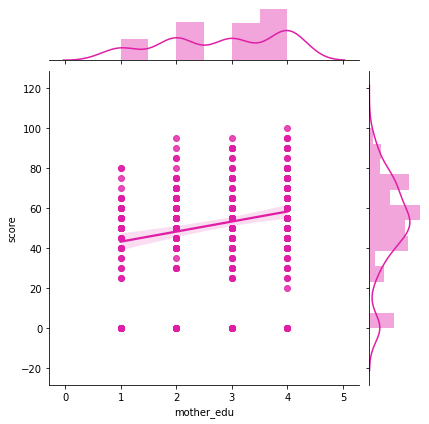

In [93]:
sns.jointplot(x='mother_edu', y='score', data=students, kind='reg', color='#E01EA5')

In [94]:
np.corrcoef(students.mother_edu, students.score)

array([[1.        , 0.23500672],
       [0.23500672, 1.        ]])

## Промежуточные выводы:

- коэффициент корреляции говорит о достаточно сильном влиянии материнского образования на уровень образования по математике
- всё больше задумываюсь об поиске связи в комбинациях признаков, пока нет представления как это можно реализовать.

## 2.8 father_edu - (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее):

    - числовой признак

In [95]:
students.father_edu = students.father_edu.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(students.father_edu.value_counts())

,father_edu
2.0,105
3.0,94
4.0,88
1.0,75
nan,24
0.0,2
40.0,1


### 40.0 - выброс или ошибка? Посмотрим детальнее:

In [96]:
students[students.father_edu == '40.0']

,school_name,gender,age,address,mother_edu,father_edu,mother_job,father_job,reason,guardian,travel_time,study_time,failures,add_sch_support,family_support,paid,add_school_activities,kinder_garden,granular,wish_high_edu,internet,romantic,family_relations,free_time,go_out,health,absences,score
11,GP,F,15,U,2,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60


In [97]:
students[(students.score == 60)].father_edu.value_counts()

2.0     8
4.0     8
3.0     6
1.0     6
nan     2
40.0    1
Name: father_edu, dtype: int64

исправим на 4.0

In [98]:
students.father_edu.loc[11]='4.0'

In [99]:
pd.DataFrame(students.father_edu.value_counts())

,father_edu
2.0,105
3.0,94
4.0,89
1.0,75
nan,24
0.0,2


### Mне не нравится количество строк с уровнем образования 0.0. Их всего два, когда в других категориях значений значительно больше. Поэтому я изменю значения для уровня образования отца на часто встречаемые значения при определённом score: 

In [100]:
students[students.father_edu == '0.0']

,school_name,gender,age,address,mother_edu,father_edu,mother_job,father_job,reason,guardian,travel_time,study_time,failures,add_sch_support,family_support,paid,add_school_activities,kinder_garden,granular,wish_high_edu,internet,romantic,family_relations,free_time,go_out,health,absences,score
76,GP,M,15,U,4,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,-12.0,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50
171,GP,M,16,U,1,0.0,other,other,reputation,mother,2.0,2.0,NaN,no,yes,yes,yes,yes,-6.0,NaN,yes,yes,4.0,3.0,2.0,3.0,2.0,80


In [101]:
students[(students.score == 80)].father_edu.value_counts()

2.0    4
3.0    4
4.0    4
1.0    3
0.0    1
Name: father_edu, dtype: int64

In [102]:
students[(students.score == 50)].father_edu.value_counts()

3.0    17
1.0    15
2.0    13
4.0     7
0.0     1
nan     1
Name: father_edu, dtype: int64

In [103]:
students.father_edu.loc[76]='3.0'
students.father_edu.loc[171]='4.0'

 ### Посмотрим теперь на пустые значения:

In [104]:
students[students.father_edu == 'nan']

,school_name,gender,age,address,mother_edu,father_edu,mother_job,father_job,reason,guardian,travel_time,study_time,failures,add_sch_support,family_support,paid,add_school_activities,kinder_garden,granular,wish_high_edu,internet,romantic,family_relations,free_time,go_out,health,absences,score
21,GP,M,15,U,4,nan,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,-3.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75
42,GP,M,15,U,4,nan,services,teacher,course,father,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,2.0,90
46,GP,F,16,U,3,nan,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55
57,GP,M,15,U,4,nan,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,no,no,3.0,2.0,2.0,5.0,4.0,75
58,GP,M,15,U,1,nan,other,at_home,home,father,1.0,2.0,0.0,yes,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,2.0,5.0,2.0,45
67,GP,F,16,U,3,nan,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,-12.0,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30
137,GP,F,16,U,3,nan,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0
142,GP,F,15,U,4,nan,teacher,services,course,mother,NaN,3.0,0.0,no,yes,yes,yes,yes,-9.0,NaN,yes,no,4.0,2.0,2.0,5.0,2.0,55
159,GP,M,16,U,3,nan,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60
161,GP,M,15,R,3,nan,other,NaN,course,mother,2.0,2.0,2.0,yes,yes,no,no,yes,-6.0,yes,yes,yes,4.0,4.0,4.0,3.0,6.0,35


### Имея индексы строк где нужно скорректировать пустое значение я воспользуюсь функцией _get_freq_values(column_name,score,if_nan_value)_ которая возвращает наиболее часто встречающееся значение уровня образования отца при значении score:

In [105]:
students[students.father_edu == 'nan'].index

Int64Index([ 21,  42,  46,  57,  58,  67, 137, 142, 159, 161, 180, 195, 232,
            236, 259, 280, 281, 286, 287, 290, 310, 328, 349, 374],
           dtype='int64')

In [106]:
for each in students[students.father_edu == 'nan'].index:
    students.father_edu.loc[each] = get_freq_values('father_edu',students.score.loc[each],'2.0')

In [107]:
students[students.father_edu == 'nan']

,school_name,gender,age,address,mother_edu,father_edu,mother_job,father_job,reason,guardian,travel_time,study_time,failures,add_sch_support,family_support,paid,add_school_activities,kinder_garden,granular,wish_high_edu,internet,romantic,family_relations,free_time,go_out,health,absences,score


In [108]:
students.groupby(['father_edu'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
father_edu,,,,,,,,
1.0,76.0,46.184211,22.932777,0.0,35.00,50.0,60.0,90.0
2.0,120.0,51.500000,24.250097,0.0,43.75,55.0,70.0,95.0
3.0,99.0,54.040404,20.487387,0.0,45.00,50.0,65.0,100.0
4.0,94.0,56.276596,22.847510,0.0,50.00,60.0,70.0,95.0


In [109]:
students.father_edu = students.father_edu.astype(float).apply(lambda x:int(x))

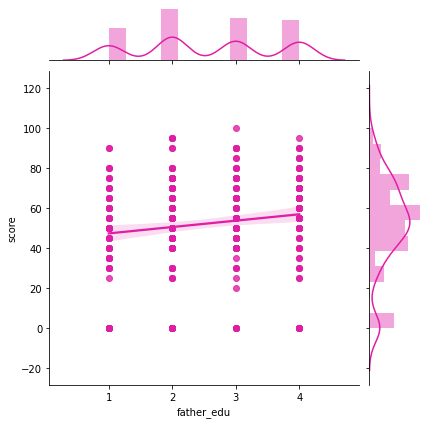

In [110]:
sns.jointplot(x='father_edu', y='score', data=students, kind='reg', color='#E01EA5') 

In [111]:
np.corrcoef(students.father_edu, students.score)

array([[1.        , 0.14764553],
       [0.14764553, 1.        ]])

## Промежуточные выводы:

- связь есть но меньше чем от маминого уровня образования

## 2.9 mother_job - ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое):

    - нечисловой/номинативный признак

In [112]:
students.mother_job = students.mother_job.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(students.mother_job.value_counts())

,mother_job
other,127
services,98
at_home,58
teacher,55
health,32
nan,19


In [113]:
students.groupby(['mother_job'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
mother_job,,,,,,,,
at_home,58.0,45.689655,23.868210,0.0,40.0,50.0,63.75,95.0
health,32.0,60.625000,21.580681,0.0,50.0,65.0,75.00,100.0
nan,19.0,55.263158,25.575253,0.0,47.5,55.0,72.50,90.0
other,127.0,49.527559,21.698082,0.0,40.0,55.0,65.00,95.0
services,98.0,54.744898,23.068393,0.0,45.0,55.0,70.00,95.0
teacher,55.0,55.181818,22.463213,0.0,45.0,55.0,72.50,95.0


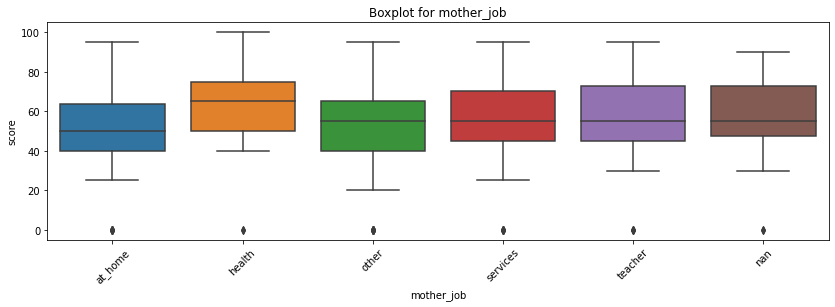

In [114]:
get_boxplot('mother_job')

### Пустые значения _nan_ есть чтото среднее между _service_ and _teacher_. Воспользуюсь техникой наиболее часто встречающихся значений чтоб заполнить пустые значения:

In [115]:
students[students.mother_job == 'nan']

,school_name,gender,age,address,mother_edu,father_edu,mother_job,father_job,reason,guardian,travel_time,study_time,failures,add_sch_support,family_support,paid,add_school_activities,kinder_garden,granular,wish_high_edu,internet,romantic,family_relations,free_time,go_out,health,absences,score
29,GP,M,16,U,4,4,nan,teacher,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,yes,4.0,4.0,5.0,5.0,16.0,55
54,GP,F,15,U,3,3,nan,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,-3.0,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65
59,GP,F,16,U,4,2,nan,NaN,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,-6.0,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80
88,GP,M,16,U,2,2,nan,other,reputation,father,2.0,2.0,1.0,no,no,yes,yes,NaN,-6.0,yes,yes,no,4.0,4.0,2.0,NaN,12.0,50
104,GP,M,15,U,3,4,nan,other,course,mother,NaN,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,yes,no,5.0,4.0,4.0,1.0,0.0,90
128,GP,M,18,R,2,2,nan,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0
145,GP,F,15,U,1,1,nan,services,course,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,4.0,2.0,NaN,0.0,55
156,GP,M,17,R,1,2,nan,other,reputation,mother,1.0,1.0,0.0,no,no,no,no,yes,-3.0,yes,no,no,2.0,2.0,2.0,5.0,8.0,65
166,GP,M,16,U,2,2,nan,other,course,father,1.0,2.0,0.0,no,no,no,no,yes,-6.0,no,yes,no,4.0,3.0,5.0,4.0,4.0,50
174,GP,F,16,U,3,3,nan,other,reputation,mother,2.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,4.0,5.0,4.0,4.0,45


In [116]:
students[students.mother_job == 'nan'].index

Int64Index([ 29,  54,  59,  88, 104, 128, 145, 156, 166, 174, 177, 219, 224,
            260, 265, 268, 277, 291, 337],
           dtype='int64')

In [117]:
for each in students[students.mother_job == 'nan'].index:
    students.mother_job.loc[each] = get_freq_values('mother_job',students.score.loc[each],'other')

In [118]:
students.groupby(['mother_job'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
mother_job,,,,,,,,
at_home,62.0,45.967742,23.097064,0.0,40.0,50.0,60.0,95.0
health,32.0,60.625000,21.580681,0.0,50.0,65.0,75.0,100.0
other,137.0,49.051095,21.958625,0.0,40.0,55.0,65.0,95.0
services,102.0,55.931373,23.396395,0.0,45.0,55.0,75.0,95.0
teacher,56.0,55.625000,22.503788,0.0,45.0,55.0,75.0,95.0


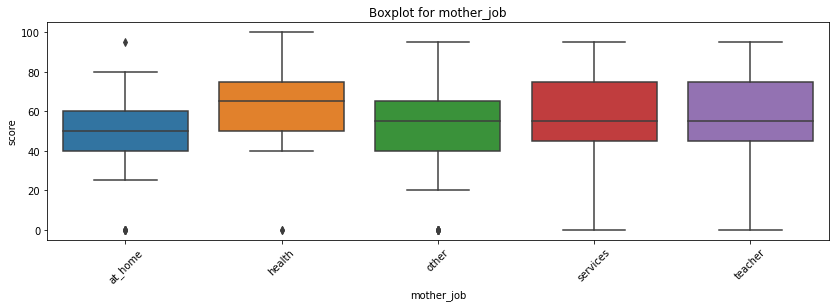

In [119]:
get_boxplot('mother_job')

## Промежуточные выводы:

- у мам которые работают в сфере здравоохранения более смышлённые дети в математике
- но в целом если мама с образованием и работой то результат успешности выше, мать которая сидит дома.

## 2.10 father_job - ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое):

    - нечисловой/номинативный признак

In [120]:
students.father_job = students.father_job.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(students.father_job.value_counts())

,father_job
other,194
services,99
nan,36
teacher,29
at_home,16
health,15


In [121]:
students.groupby(['father_job'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
father_job,,,,,,,,
at_home,16.0,51.875000,25.876308,0.0,43.75,55.0,66.25,95.0
health,15.0,55.666667,14.984119,35.0,42.50,55.0,67.50,80.0
nan,36.0,54.444444,28.177442,0.0,40.00,52.5,75.00,100.0
other,194.0,51.417526,21.985061,0.0,40.00,55.0,65.00,95.0
services,99.0,50.454545,21.666429,0.0,45.00,55.0,65.00,90.0
teacher,29.0,59.827586,27.434427,0.0,50.00,70.0,80.00,95.0


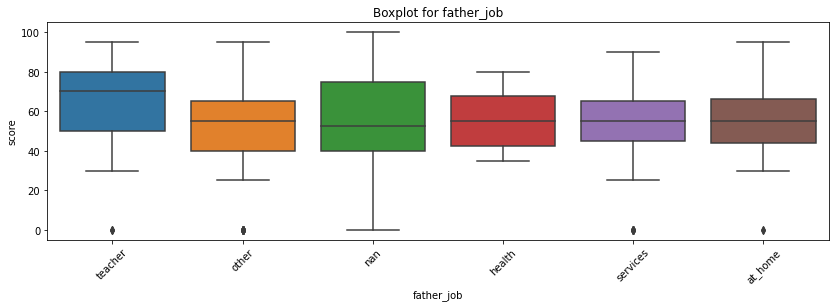

In [122]:
get_boxplot('father_job')

In [123]:
students[students.father_job == 'nan']

,school_name,gender,age,address,mother_edu,father_edu,mother_job,father_job,reason,guardian,travel_time,study_time,failures,add_sch_support,family_support,paid,add_school_activities,kinder_garden,granular,wish_high_edu,internet,romantic,family_relations,free_time,go_out,health,absences,score
3,GP,F,15,U,4,2,health,nan,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75
17,GP,F,16,U,3,3,other,nan,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,NaN,yes,no,no,5.0,3.0,2.0,4.0,4.0,50
22,GP,M,16,U,4,2,teacher,nan,course,mother,1.0,2.0,0.0,no,NaN,no,yes,NaN,-6.0,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80
26,GP,M,15,U,2,2,other,nan,home,mother,NaN,1.0,0.0,no,yes,NaN,no,yes,-3.0,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55
31,GP,M,15,U,4,4,services,nan,reputation,mother,2.0,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,yes,no,4.0,3.0,1.0,5.0,0.0,85
44,GP,F,16,U,2,2,other,nan,course,father,2.0,2.0,1.0,yes,no,no,NaN,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,14.0,45
47,GP,M,16,U,4,3,health,nan,reputation,mother,1.0,4.0,0.0,no,no,no,yes,yes,-12.0,yes,yes,no,4.0,2.0,2.0,2.0,4.0,100
52,GP,M,15,U,4,2,health,nan,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,-3.0,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50
59,GP,F,16,U,4,2,teacher,nan,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,-6.0,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80
68,GP,F,15,R,2,2,health,nan,reputation,mother,NaN,2.0,NaN,yes,yes,NaN,no,yes,-6.0,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40


In [124]:
students[students.father_job == 'nan'].score.value_counts().sort_index(axis=0,ascending=False)

100    1
95     1
90     2
85     2
80     2
75     3
70     4
65     1
60     1
55     1
50     6
45     1
40     3
35     1
25     2
20     1
0      4
Name: score, dtype: int64

In [125]:
students[students.father_job == 'nan'].index

Int64Index([  3,  17,  22,  26,  31,  44,  47,  52,  59,  68, 107, 118, 120,
            135, 151, 152, 160, 161, 169, 182, 216, 229, 250, 266, 294, 303,
            309, 316, 336, 341, 345, 363, 365, 373, 374, 384],
           dtype='int64')

In [126]:
for each in students[students.father_job == 'nan'].index:
    students.father_job.loc[each] = get_freq_values('father_job',students.score.loc[each],'other')

In [127]:
students.groupby(['father_job'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
father_job,,,,,,,,
at_home,16.0,51.875000,25.876308,0.0,43.75,55.0,66.25,95.0
health,15.0,55.666667,14.984119,35.0,42.50,55.0,67.50,80.0
other,223.0,51.614350,22.865533,0.0,40.00,55.0,65.00,100.0
services,104.0,50.480769,21.828093,0.0,43.75,55.0,65.00,90.0
teacher,31.0,61.451613,27.239480,0.0,50.00,70.0,82.50,95.0


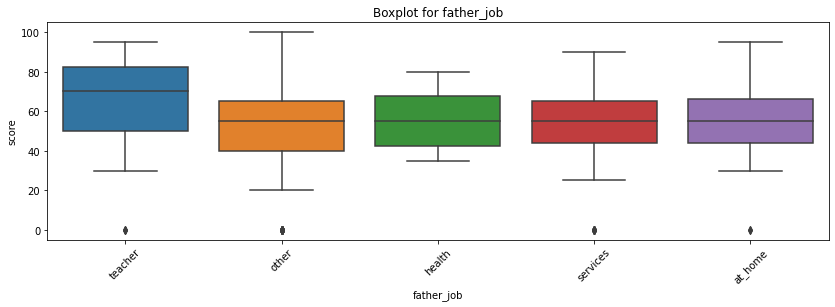

In [128]:
get_boxplot('father_job')

## Промежуточные выводы:

- у пап которые работают в сфере образования более смышлённые дети в математике

## 2.11 reason - ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое):

- нечисловой/номинативный признак

In [129]:
students.reason = students.reason.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(students.reason.value_counts())

,reason
course,135
reputation,102
home,101
other,34
nan,17


In [130]:
students.groupby(['reason'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
reason,,,,,,,,
course,135.0,49.814815,23.841888,0.0,40.00,50.0,65.0,95.0
home,101.0,51.188119,23.865755,0.0,40.00,55.0,65.0,95.0
nan,17.0,50.588235,23.377497,0.0,45.00,55.0,65.0,80.0
other,34.0,55.882353,19.363766,0.0,46.25,55.0,65.0,95.0
reputation,102.0,55.637255,21.568123,0.0,45.00,55.0,70.0,100.0


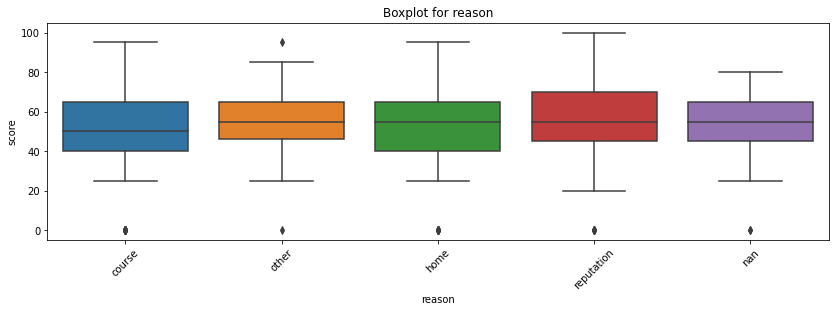

In [131]:
get_boxplot('reason')

## Промежуточные выводы:

- почти все категории одинаковы. Удаляю столбец.

In [132]:
students.drop(['reason'], inplace = True, axis = 1)

## 2.12 guardian - ('mother' - мать, 'father' - отец, 'other' - другое):

- нечисловой/номинативный признак

In [133]:
students.guardian = students.guardian.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(students.guardian.value_counts())

,guardian
mother,248
father,86
nan,31
other,24


In [134]:
students.groupby(['guardian'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
guardian,,,,,,,,
father,86.0,53.430233,22.664583,0.0,45.0,55.0,70.00,90.0
mother,248.0,52.600806,23.464805,0.0,40.0,55.0,70.00,100.0
nan,31.0,51.451613,17.568606,0.0,47.5,55.0,60.00,75.0
other,24.0,45.625000,24.375348,0.0,40.0,50.0,61.25,90.0


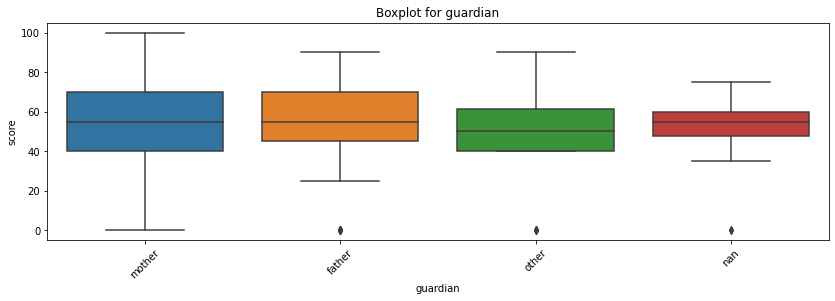

In [135]:
get_boxplot('guardian')

In [136]:
students[students.guardian == 'nan']

,school_name,gender,age,address,mother_edu,father_edu,mother_job,father_job,guardian,travel_time,study_time,failures,add_sch_support,family_support,paid,add_school_activities,kinder_garden,granular,wish_high_edu,internet,romantic,family_relations,free_time,go_out,health,absences,score
38,GP,F,15,R,3,4,services,health,nan,1.0,3.0,0.0,yes,NaN,yes,yes,yes,-9.0,yes,yes,no,4.0,3.0,2.0,5.0,2.0,55
41,GP,M,15,U,4,4,teacher,other,nan,1.0,1.0,0.0,no,yes,no,no,no,-3.0,yes,yes,NaN,5.0,4.0,3.0,5.0,8.0,60
49,GP,F,15,U,4,4,services,teacher,nan,1.0,2.0,1.0,yes,yes,no,yes,no,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,2.0,35
53,GP,F,15,U,4,4,services,services,nan,1.0,1.0,0.0,yes,yes,yes,no,yes,-3.0,yes,yes,no,3.0,3.0,4.0,5.0,0.0,55
60,GP,F,16,R,4,4,health,teacher,nan,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,no,no,2.0,4.0,4.0,4.0,6.0,55
81,GP,M,15,U,2,3,other,other,nan,1.0,3.0,0.0,yes,no,NaN,NaN,no,-9.0,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55
90,GP,F,16,U,3,3,other,other,nan,1.0,3.0,0.0,no,yes,yes,no,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,4.0,0.0,40
98,GP,F,16,U,4,4,other,other,nan,1.0,1.0,0.0,no,NaN,no,yes,no,-3.0,yes,NaN,no,5.0,3.0,4.0,1.0,6.0,70
138,GP,M,16,U,1,1,services,other,nan,1.0,2.0,1.0,no,no,no,no,yes,-6.0,yes,no,yes,4.0,4.0,4.0,5.0,0.0,60
144,GP,M,17,U,2,1,other,other,nan,1.0,1.0,3.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0


In [137]:
students[students.guardian == 'nan'].score.value_counts().sort_index(axis=0,ascending=False)

75    2
70    3
65    2
60    5
55    4
50    7
45    2
40    1
35    3
0     2
Name: score, dtype: int64

In [138]:
for each in students[students.guardian == 'nan'].index:
    students.guardian.loc[each] = get_freq_values('guardian',students.score.loc[each],'mother')

In [139]:
students.groupby(['guardian'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
guardian,,,,,,,,
father,86.0,53.430233,22.664583,0.0,45.0,55.0,70.00,90.0
mother,279.0,52.473118,22.861292,0.0,40.0,55.0,70.00,100.0
other,24.0,45.625000,24.375348,0.0,40.0,50.0,61.25,90.0


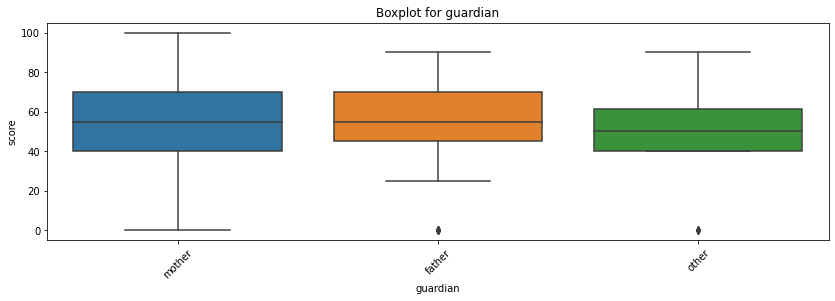

In [140]:
get_boxplot('guardian')

## Промежуточные выводы:

- ребенку однозначно лучше под опекой родителей.

## 2.13 travel_time - (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.):

- числовой признак

In [141]:
students.travel_time = students.travel_time.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(students.travel_time.value_counts())

,travel_time
1.0,239
2.0,94
nan,28
3.0,21
4.0,7


In [142]:
students.groupby(['travel_time'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
travel_time,,,,,,,,
1.0,239.0,53.577406,22.794876,0.0,45.00,55.0,70.0,100.0
2.0,94.0,51.755319,21.486523,0.0,41.25,50.0,65.0,95.0
3.0,21.0,46.428571,26.558561,0.0,40.00,50.0,65.0,90.0
4.0,7.0,50.000000,9.128709,35.0,47.50,50.0,52.5,65.0
nan,28.0,47.678571,27.771626,0.0,30.00,55.0,67.5,90.0


In [143]:
for each in students[students.travel_time == 'nan'].index:
    students.travel_time.loc[each] = get_freq_values('travel_time',students.score.loc[each],'1.0')

In [144]:
students.groupby(['travel_time'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
travel_time,,,,,,,,
1.0,267.0,52.958801,23.376821,0.0,40.00,55.0,70.0,100.0
2.0,94.0,51.755319,21.486523,0.0,41.25,50.0,65.0,95.0
3.0,21.0,46.428571,26.558561,0.0,40.00,50.0,65.0,90.0
4.0,7.0,50.000000,9.128709,35.0,47.50,50.0,52.5,65.0


In [145]:
students.travel_time = students.travel_time.astype(float).apply(lambda x:int(x))

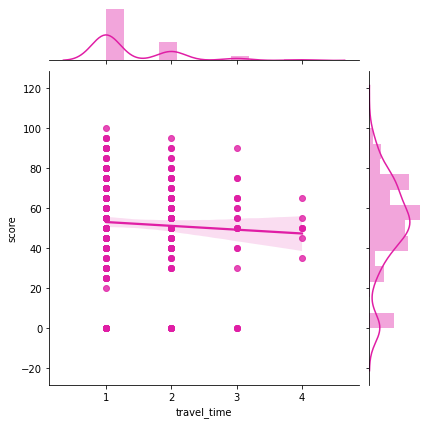

In [146]:
sns.jointplot(x='travel_time', y='score', data=students, kind='reg', color='#E01EA5') 

In [147]:
np.corrcoef(students.travel_time, students.score)

array([[ 1.        , -0.05653483],
       [-0.05653483,  1.        ]])

## Промежуточные выводы:

- зависимость прямопропорциональная но незначительная, скорей всего будут иметь место комбинации негативных факторов, совместное их влияние на успешность

## 2.14 study_time - (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов):

- числовой признак

In [148]:
students.study_time = students.study_time.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(students.study_time.value_counts())

,study_time
2.0,189
1.0,103
3.0,63
4.0,27
nan,7


In [149]:
students.groupby(['study_time'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
study_time,,,,,,,,
1.0,103.0,49.466019,24.383704,0.0,40.0,50.0,65.0,95.0
2.0,189.0,50.820106,21.530271,0.0,40.0,55.0,65.0,95.0
3.0,63.0,57.777778,22.392715,0.0,50.0,60.0,75.0,95.0
4.0,27.0,56.296296,26.406315,0.0,45.0,60.0,72.5,100.0
nan,7.0,67.142857,16.797109,50.0,55.0,65.0,77.5,90.0


In [150]:
for each in students[students.study_time == 'nan'].index:
    students.study_time.loc[each] = get_freq_values('study_time',students.score.loc[each],'2.0')

In [151]:
students.groupby(['study_time'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
study_time,,,,,,,,
1.0,103.0,49.466019,24.383704,0.0,40.0,50.0,65.0,95.0
2.0,196.0,51.403061,21.559596,0.0,40.0,55.0,65.0,95.0
3.0,63.0,57.777778,22.392715,0.0,50.0,60.0,75.0,95.0
4.0,27.0,56.296296,26.406315,0.0,45.0,60.0,72.5,100.0


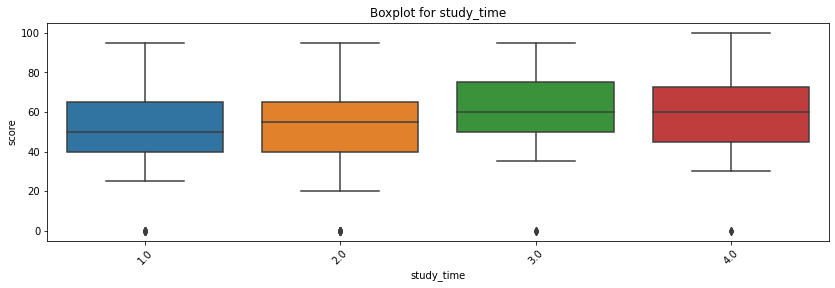

In [152]:
get_boxplot('study_time')

In [153]:
students.study_time = students.study_time.astype(float).apply(lambda x:int(x))

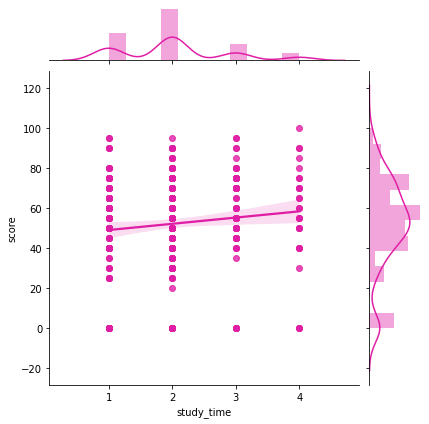

In [154]:
sns.jointplot(x='study_time', y='score', data=students, kind='reg', color='#E01EA5') 

In [155]:
np.corrcoef(students.study_time, students.score)

array([[1.        , 0.11429546],
       [0.11429546, 1.        ]])

## Промежуточные выводы:

- зависимость есть, согласно здравому смыслу, заниматься нужно но до определёного лимита, 
  после 10 часов в неделю успеваимость не улучшается, оптимальное значение 5-10 часов

## 2.15 failures - (n, если 1<=n<=3, иначе 0):

- числовой признак

In [156]:
students.failures = students.failures.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(students.failures.value_counts())

,failures
0.0,290
1.0,48
nan,22
2.0,15
3.0,14


In [157]:
students.groupby(['failures'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
failures,,,,,,,,
0.0,290.0,56.051724,20.905474,0.0,46.25,55.0,70.00,100.0
1.0,48.0,40.000000,23.856843,0.0,32.50,42.5,60.00,90.0
2.0,15.0,32.333333,24.191695,0.0,10.00,40.0,45.00,75.0
3.0,14.0,29.642857,20.797955,0.0,6.25,35.0,48.75,50.0
nan,22.0,57.045455,23.837700,0.0,46.25,62.5,73.75,90.0


In [158]:
for each in students[students.failures == 'nan'].index:
    students.failures.loc[each] = get_freq_values('failures',students.score.loc[each],'0.0')

In [159]:
students.groupby(['failures'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
failures,,,,,,,,
0.0,312.0,56.121795,21.084531,0.0,45.00,55.0,70.00,100.0
1.0,48.0,40.000000,23.856843,0.0,32.50,42.5,60.00,90.0
2.0,15.0,32.333333,24.191695,0.0,10.00,40.0,45.00,75.0
3.0,14.0,29.642857,20.797955,0.0,6.25,35.0,48.75,50.0


In [160]:
students.failures = students.failures.astype(float).apply(lambda x:int(x))

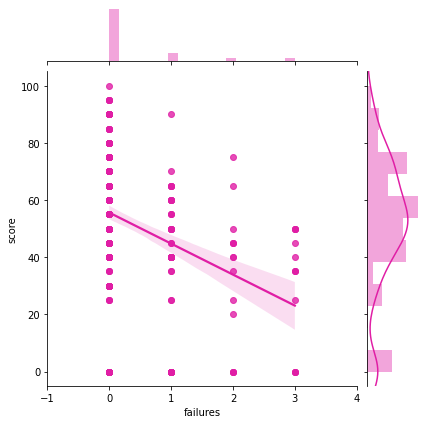

In [161]:
plot = sns.jointplot(x='failures', y='score', data=students, kind='reg', color='#E01EA5') 
plot.ax_marg_x.set_xlim(-1, 4)
plot.ax_marg_y.set_ylim(-5, 105)

plt.show()

In [162]:
np.corrcoef(students.failures, students.score)

array([[ 1.        , -0.33718684],
       [-0.33718684,  1.        ]])

## Промежуточные выводы:

    - самая сильная пока обратная зависимость (самый высокий корреляционый коэффициент), чем больше неудач тем слабей оценка по математике.

## 2.16 add_sch_support - (yes или no):

- нечисловой признак

In [163]:
students.add_sch_support = students.add_sch_support.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(students.add_sch_support.value_counts())

,add_sch_support
no,331
yes,49
nan,9


In [164]:
students.groupby(['add_sch_support'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
add_sch_support,,,,,,,,
nan,9.0,48.888889,17.814632,25.0,35.0,45.0,65.0,75.0
no,331.0,53.126888,23.953153,0.0,45.0,55.0,70.0,100.0
yes,49.0,47.040816,14.610155,0.0,40.0,50.0,55.0,85.0


In [165]:
for each in students[students.add_sch_support == 'nan'].index:
    students.add_sch_support.loc[each] = get_freq_values('add_sch_support',students.score.loc[each],'no')

In [166]:
students.groupby(['add_sch_support'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
add_sch_support,,,,,,,,
no,340.0,53.014706,23.800729,0.0,45.0,55.0,70.0,100.0
yes,49.0,47.040816,14.610155,0.0,40.0,50.0,55.0,85.0


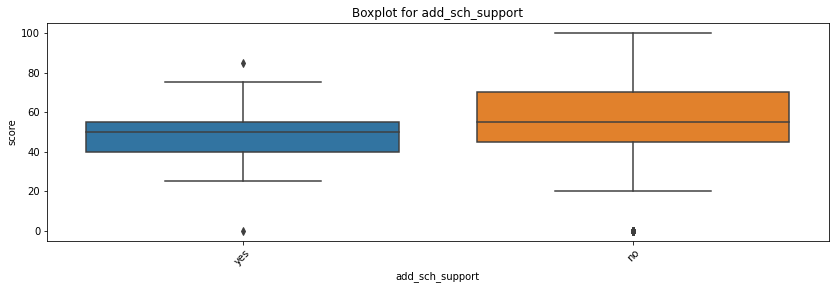

In [167]:
get_boxplot('add_sch_support')

## Промежуточные выводы:

    - странная закономерность, наверное вопрос к школе зачем такая подготовка если результат не лучше, а хуже, хотя может там совсем тяжёлая категория студентов? - по таблице ниже только absences выделяется, но не у всех проблемы с посещаемостью

In [168]:
students[students.add_sch_support == 'yes']

,school_name,gender,age,address,mother_edu,father_edu,mother_job,father_job,guardian,travel_time,study_time,failures,add_sch_support,family_support,paid,add_school_activities,kinder_garden,granular,wish_high_edu,internet,romantic,family_relations,free_time,go_out,health,absences,score
0,GP,F,18,U,4,4,at_home,teacher,mother,2,2,0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30
2,GP,F,15,U,1,1,at_home,other,mother,1,2,3,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50
7,GP,F,17,U,4,4,other,teacher,mother,2,2,0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30
17,GP,F,16,U,3,3,other,other,mother,3,2,0,yes,NaN,no,yes,yes,NaN,yes,no,no,5.0,3.0,2.0,4.0,4.0,50
24,GP,F,15,R,2,4,services,health,mother,1,3,0,yes,yes,yes,yes,yes,-9.0,yes,yes,no,4.0,3.0,2.0,5.0,NaN,40
28,GP,M,16,U,3,4,services,other,mother,1,2,0,yes,NaN,no,yes,yes,-6.0,yes,yes,no,5.0,3.0,3.0,5.0,4.0,55
38,GP,F,15,R,3,4,services,health,mother,1,3,0,yes,NaN,yes,yes,yes,-9.0,yes,yes,no,4.0,3.0,2.0,5.0,2.0,55
39,GP,F,15,R,2,2,at_home,other,mother,1,1,0,yes,yes,yes,yes,yes,-3.0,yes,no,no,4.0,3.0,1.0,2.0,8.0,65
43,GP,M,15,U,2,2,services,services,father,1,1,0,yes,yes,no,NaN,yes,-3.0,yes,yes,no,NaN,4.0,1.0,1.0,0.0,55
44,GP,F,16,U,2,2,other,services,father,2,2,1,yes,no,no,NaN,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,14.0,45


## 2.17 family_support - (yes или no):

- нечисловой признак

In [169]:
students.family_support = students.family_support.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(students.family_support.value_counts())

,family_support
yes,216
no,135
nan,38


In [170]:
for each in students[students.family_support == 'nan'].index:
    students.family_support.loc[each] = get_freq_values('family_support',students.score.loc[each],'yes')

In [171]:
students.groupby(['family_support'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
family_support,,,,,,,,
no,135.0,52.074074,23.997708,0.0,42.5,55.0,67.5,100.0
yes,254.0,52.362205,22.372403,0.0,40.0,55.0,70.0,95.0


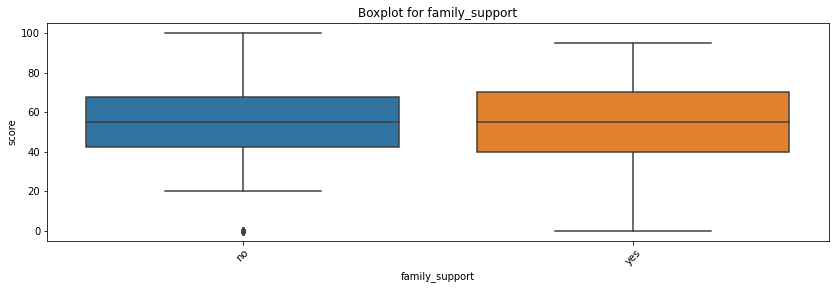

In [172]:
get_boxplot('family_support')

## Промежуточные выводы:

    - если есть поддержка семьи то результаты по математике немного получше, очень незначительно

## 2.18 paid - (yes или no):

- нечисловой признак

In [173]:
students.paid = students.paid.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(students.paid.value_counts())

,paid
no,197
yes,153
nan,39


In [174]:
students.groupby(['paid'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
paid,,,,,,,,
nan,39.0,51.153846,21.474022,0.0,40.0,50.0,65.0,90.0
no,197.0,50.355330,25.522612,0.0,40.0,55.0,70.0,100.0
yes,153.0,55.000000,19.313889,0.0,45.0,55.0,70.0,95.0


In [175]:
for each in students[students.paid == 'nan'].index:
    students.paid.loc[each] = get_freq_values('paid',students.score.loc[each],'no')

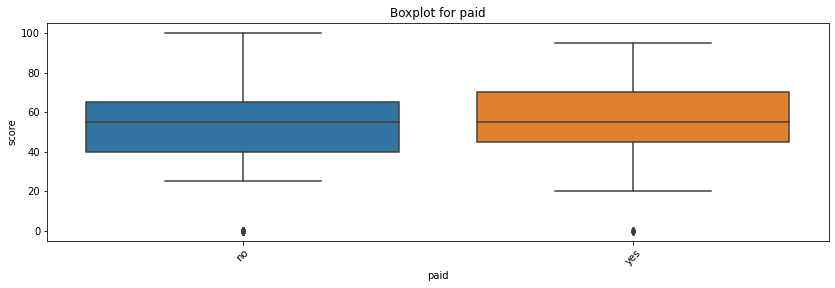

In [176]:
get_boxplot('paid')

## Промежуточные выводы:

    - тоже вопросы к этим платным занятиям, разницы ощутимой не заметно

## 2.19 add_school_activities - (yes или no):

- нечисловой признак

In [177]:
students.add_school_activities = students.add_school_activities.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(students.add_school_activities.value_counts())

,add_school_activities
yes,192
no,183
nan,14


In [178]:
students.groupby(['add_school_activities'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
add_school_activities,,,,,,,,
nan,14.0,47.500000,22.166329,0.0,45.0,52.5,62.5,70.0
no,183.0,52.185792,22.357692,0.0,40.0,55.0,65.0,95.0
yes,192.0,52.682292,23.568283,0.0,45.0,55.0,70.0,100.0


In [179]:
for each in students[students.add_school_activities == 'nan'].index:
    students.add_school_activities.loc[each] = get_freq_values('add_school_activities',students.score.loc[each],'yes')

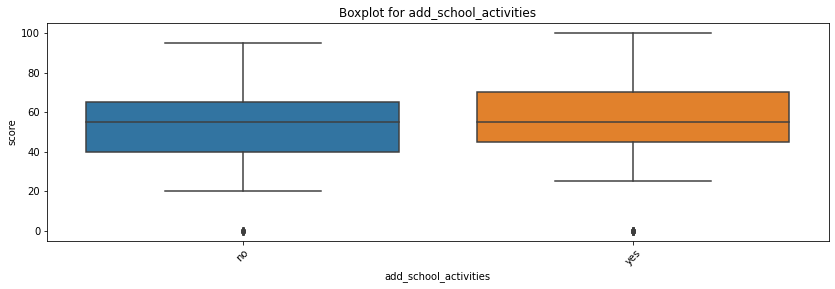

In [180]:
get_boxplot('add_school_activities')

## Промежуточные выводы:

    - чуть лучше успеваемость у активных школьников

## 2.20 kinder_garden - (yes или no):

- нечисловой признак

In [181]:
students.kinder_garden = students.kinder_garden.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(students.kinder_garden.value_counts())

,kinder_garden
yes,297
no,77
nan,15


In [182]:
students.groupby(['kinder_garden'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
kinder_garden,,,,,,,,
nan,15.0,50.000000,28.784917,0.0,45.0,55.0,72.5,80.0
no,77.0,50.000000,22.492689,0.0,40.0,55.0,65.0,90.0
yes,297.0,52.962963,22.745848,0.0,40.0,55.0,70.0,100.0


In [183]:
for each in students[students.kinder_garden == 'nan'].index:
    students.kinder_garden.loc[each] = get_freq_values('kinder_garden',students.score.loc[each],'yes')

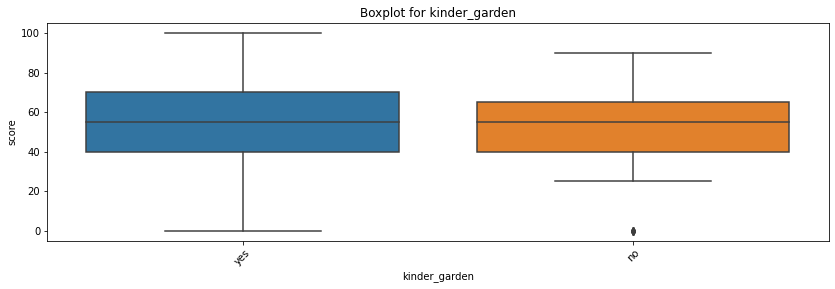

In [184]:
get_boxplot('kinder_garden')

## Промежуточные выводы:

    - чуть лучше успеваемость у школьников которые посещали детский сад

## 2.21 granular - не объяснённые параметры:

- числовой признак

In [185]:
students.granular = students.granular.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(students.granular.value_counts())

,granular
-6.0,189
-3.0,103
-9.0,63
-12.0,27
nan,7


In [186]:
students.groupby(['granular'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
granular,,,,,,,,
-12.0,27.0,56.296296,26.406315,0.0,45.0,60.0,72.5,100.0
-3.0,103.0,49.466019,24.383704,0.0,40.0,50.0,65.0,95.0
-6.0,189.0,50.820106,21.530271,0.0,40.0,55.0,65.0,95.0
-9.0,63.0,57.777778,22.392715,0.0,50.0,60.0,75.0,95.0
nan,7.0,67.142857,16.797109,50.0,55.0,65.0,77.5,90.0


In [187]:
for each in students[students.granular == 'nan'].index:
    students.granular.loc[each] = get_freq_values('granular',students.score.loc[each],'-6.0')

In [188]:
students.granular = students.granular.astype(float).apply(lambda x:int(x))

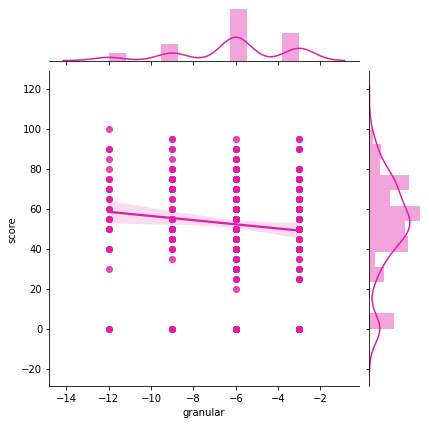

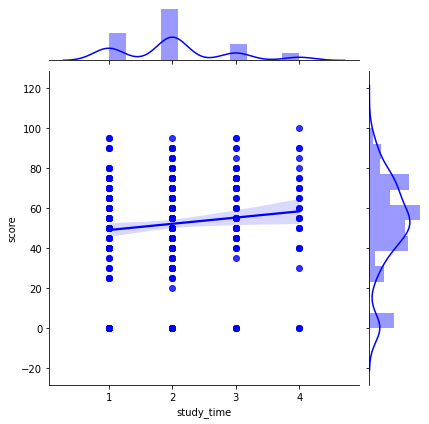

In [189]:
sns.jointplot(x='granular', y='score', data=students, kind='reg', color='#E01EA5')
sns.jointplot(x='study_time', y='score', data=students, kind='reg', color='blue')

## Промежуточные выводы:

    - обратный график времени на домашнюю подготовку, удаляем этот столбец

In [164]:
students.drop(['granular'], inplace = True, axis = 1)

## 2.22 wish_high_edu - yes or no:

- нечисловой признак

In [190]:
students.wish_high_edu = students.wish_high_edu.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(students.wish_high_edu.value_counts())

,wish_high_edu
yes,350
nan,20
no,19


In [191]:
students.groupby(['wish_high_edu'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
wish_high_edu,,,,,,,,
nan,20.0,55.250000,18.243600,0.0,50.0,52.5,70.0,80.0
no,19.0,33.684211,24.767929,0.0,0.0,40.0,50.0,65.0
yes,350.0,53.100000,22.676339,0.0,45.0,55.0,70.0,100.0


In [192]:
for each in students[students.wish_high_edu == 'nan'].index:
    students.wish_high_edu.loc[each] = get_freq_values('wish_high_edu',students.score.loc[each],'yes')

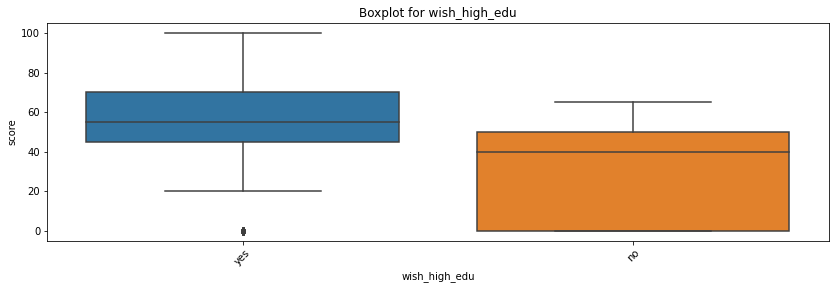

In [193]:
get_boxplot('wish_high_edu')

## Промежуточные выводы:

    - успеваемость значительно лучше у школьников которые хотят продолжать обучение в высшей школе

## 2.23 internet - yes or no:

- нечисловой признак

In [194]:
students.internet = students.internet.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(students.internet.value_counts())

,internet
yes,300
no,55
nan,34


In [195]:
students.groupby(['internet'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
internet,,,,,,,,
nan,34.0,49.852941,26.212572,0.0,40.0,55.0,70.0,95.0
no,55.0,49.090909,22.028830,0.0,42.5,50.0,60.0,90.0
yes,300.0,53.116667,22.691837,0.0,40.0,55.0,70.0,100.0


In [196]:
for each in students[students.internet == 'nan'].index:
    students.internet.loc[each] = get_freq_values('internet',students.score.loc[each],'yes')

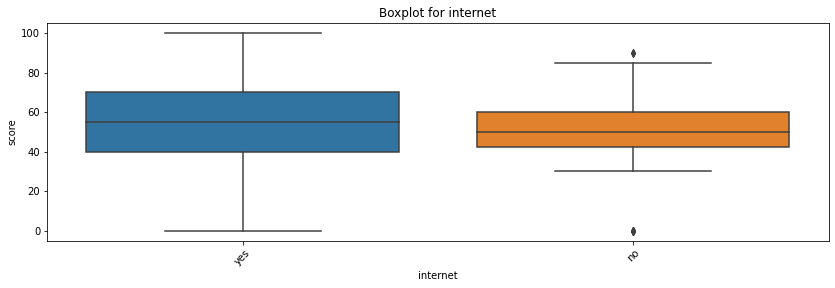

In [197]:
get_boxplot('internet')

## Промежуточные выводы:

    - успеваемость лучше у школьников которые имеют интернет дома

## 2.24 romantic - yes or no:

- нечисловой признак

In [198]:
students.romantic = students.romantic.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(students.romantic.value_counts())

,romantic
no,235
yes,123
nan,31


In [199]:
students.groupby(['romantic'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
romantic,,,,,,,,
nan,31.0,52.903226,19.823143,0.0,45.0,55.0,65.0,90.0
no,235.0,54.574468,22.126042,0.0,45.0,55.0,70.0,100.0
yes,123.0,47.682927,24.564174,0.0,40.0,55.0,65.0,90.0


In [200]:
for each in students[students.romantic == 'nan'].index:
    students.romantic.loc[each] = get_freq_values('romantic',students.score.loc[each],'yes')

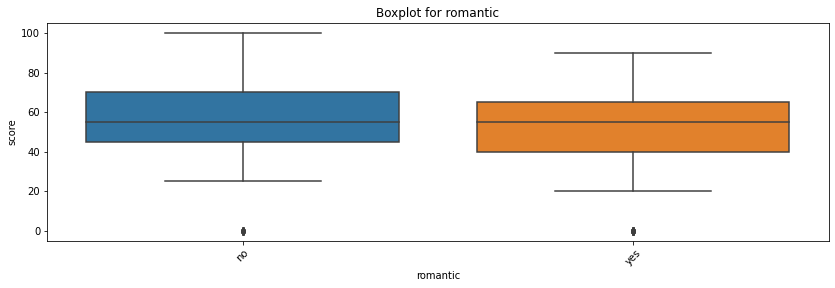

In [201]:
get_boxplot('romantic')

## Промежуточные выводы:

    - наличие или отсутствие романтических отношений оказывает не значительное влиение на успеваемость по математике

## 2.25 family_relations - от 1 - очень плохо до 5 - очень хорошо:

- числовой признак

In [203]:
students.family_relations = students.family_relations.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(students.family_relations.value_counts())

,family_relations
4.0,178
5.0,97
3.0,62
nan,27
2.0,17
1.0,7
-1.0,1


In [222]:
students.groupby(['family_relations'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
family_relations,,,,,,,,
1,9.0,50.000000,24.494897,0.0,40.0,60.0,65.0,80.0
2,17.0,48.529412,28.326484,0.0,35.0,55.0,75.0,85.0
3,62.0,51.451613,22.713235,0.0,45.0,55.0,65.0,95.0
4,202.0,51.584158,21.887668,0.0,40.0,55.0,65.0,100.0
5,99.0,55.000000,24.169892,0.0,45.0,55.0,72.5,95.0


In [212]:
students.family_relations.loc[students[students.family_relations == '-1.0'].family_relations.index] = '1.0'

In [215]:
for each in students[students.family_relations == 'nan'].index:
    students.family_relations.loc[each] = get_freq_values('family_relations',students.score.loc[each],'0.0')

In [220]:
students.family_relations = students.family_relations.astype(float).apply(lambda x:int(x))

In [221]:
students.family_relations.loc[students[students.family_relations == 0].family_relations.index] = 1

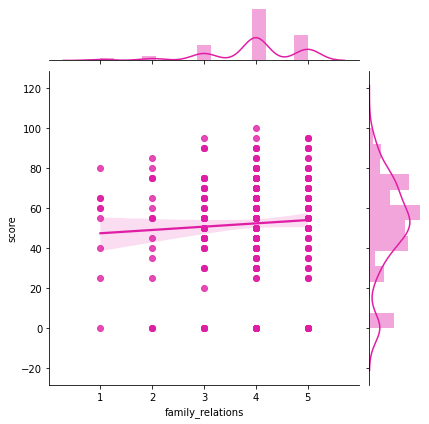

In [223]:
plot = sns.jointplot(x='family_relations', y='score', data=students, kind='reg', color='#E01EA5') 

In [219]:
np.corrcoef(students.family_relations, students.score)

array([[1.        , 0.06692313],
       [0.06692313, 1.        ]])

## Промежуточные выводы:

    - незначительное улучшение успеваемости если отношения в семье хорошие

## 2.26 free_time - от 1 - очень мало до 5 - очень много:

- числовой признак

In [224]:
students.free_time = students.free_time.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(students.free_time.value_counts())

,free_time
3.0,152
4.0,110
2.0,63
5.0,37
1.0,18
nan,9


In [227]:
students.groupby(['free_time'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
free_time,,,,,,,,
1.0,18.0,48.333333,24.131990,0.0,40.0,50.0,55.0,90.0
2.0,63.0,57.539683,21.153681,0.0,50.0,60.0,70.0,100.0
3.0,159.0,49.339623,24.012874,0.0,40.0,50.0,65.0,95.0
4.0,112.0,52.723214,21.444338,0.0,40.0,55.0,70.0,95.0
5.0,37.0,56.351351,23.559872,0.0,45.0,60.0,70.0,95.0


In [226]:
for each in students[students.free_time == 'nan'].index:
    students.free_time.loc[each] = get_freq_values('free_time',students.score.loc[each],'0.0')

In [228]:
students.free_time = students.free_time.astype(float).apply(lambda x:int(x))

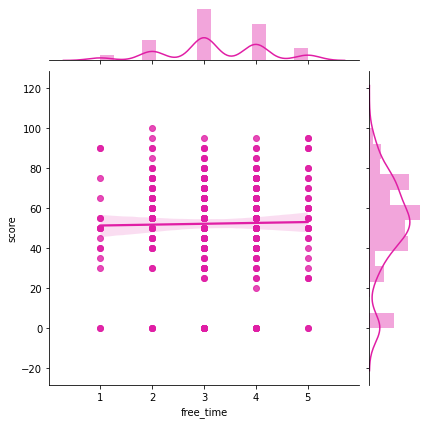

In [229]:
plot = sns.jointplot(x='free_time', y='score', data=students, kind='reg', color='#E01EA5') 

In [230]:
np.corrcoef(students.free_time, students.score)

array([[1.        , 0.01865288],
       [0.01865288, 1.        ]])

## Промежуточные выводы:

    - ещё меньше зависимость чем отношения в семье

## 2.27 go_out - от 1 - очень мало до 5 - очень много:

- числовой признак

In [231]:
students.go_out = students.go_out.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(students.go_out.value_counts())

,go_out
3.0,126
2.0,101
4.0,81
5.0,51
1.0,23
nan,7


In [234]:
students.groupby(['go_out'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
go_out,,,,,,,,
1.0,23.0,49.347826,26.684365,0.0,47.5,55.0,65.00,85.0
2.0,104.0,55.721154,23.352702,0.0,50.0,60.0,71.25,100.0
3.0,129.0,54.961240,21.014282,0.0,45.0,55.0,70.00,95.0
4.0,82.0,49.268293,21.388845,0.0,40.0,50.0,65.00,95.0
5.0,51.0,44.509804,25.382177,0.0,30.0,50.0,60.00,90.0


In [233]:
for each in students[students.go_out == 'nan'].index:
    students.go_out.loc[each] = get_freq_values('go_out',students.score.loc[each],'0.0')

In [235]:
students.go_out = students.go_out.astype(float).apply(lambda x:int(x))

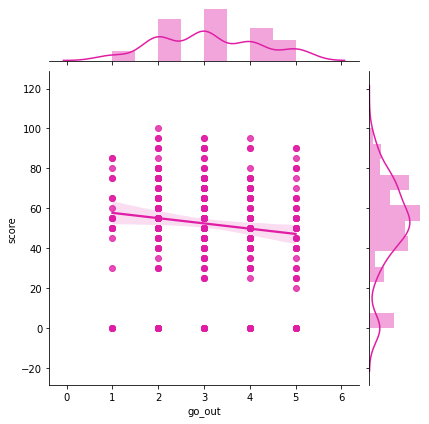

In [236]:
plot = sns.jointplot(x='go_out', y='score', data=students, kind='reg', color='#E01EA5') 

In [237]:
np.corrcoef(students.go_out, students.score)

array([[ 1.        , -0.12771374],
       [-0.12771374,  1.        ]])

## Промежуточные выводы:

    - обратная зависимость, чем больше времени с друзьями тем ниже успеваемость

## 2.28 health - от 1 - очень плохо до 5 - очень хорошо:

- числовой признак

In [238]:
students.health = students.health.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(students.health.value_counts())

,health
5.0,137
3.0,88
4.0,60
1.0,47
2.0,42
nan,15


In [241]:
students.groupby(['health'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
health,,,,,,,,
1.0,47.0,59.361702,21.759981,0.0,50.0,65.0,75.0,95.0
2.0,42.0,52.619048,27.235157,0.0,45.0,55.0,70.0,100.0
3.0,88.0,50.625000,20.578033,0.0,40.0,52.5,60.0,95.0
4.0,60.0,50.833333,24.549615,0.0,40.0,50.0,70.0,95.0
5.0,137.0,52.189781,22.547836,0.0,40.0,55.0,65.0,90.0
nan,15.0,45.000000,21.630006,0.0,37.5,50.0,57.5,75.0


In [245]:
for each in students[students.health == 'nan'].index:
    students.health.loc[each] = get_freq_values('health',students.score.loc[each],'0.0')

In [246]:
students.health = students.health.astype(float).apply(lambda x:int(x))

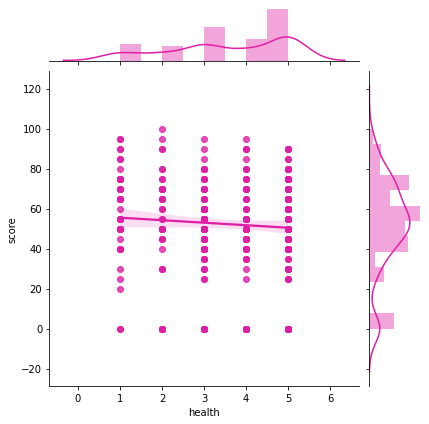

In [247]:
plot = sns.jointplot(x='health', y='score', data=students, kind='reg', color='#E01EA5') 

In [248]:
np.corrcoef(students.health, students.score)

array([[ 1.        , -0.07652175],
       [-0.07652175,  1.        ]])

## Промежуточные выводы:

    - незначительная обратная зависимость, чем крепче здоровье тем ниже успеваемость

## 2.29 absences - от 1 - очень мало до 5 - очень много:

- числовой признак

In [249]:
students.absences = students.absences.astype(str).apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(students.absences.value_counts())

,absences
0.0,110
2.0,60
4.0,52
6.0,30
8.0,20
10.0,17
12.0,12
14.0,12
nan,11
3.0,7


In [252]:
students.groupby(['absences'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
absences,,,,,,,,
0.0,119.0,43.529412,32.097263,0.0,0.00,50.0,72.50,95.0
1.0,3.0,65.000000,8.660254,60.0,60.00,60.0,67.50,75.0
10.0,17.0,56.176471,16.156405,30.0,45.00,55.0,65.00,95.0
11.0,2.0,65.000000,14.142136,55.0,60.00,65.0,70.00,75.0
12.0,12.0,53.750000,13.837531,25.0,48.75,55.0,61.25,80.0
13.0,2.0,52.500000,17.677670,40.0,46.25,52.5,58.75,65.0
14.0,12.0,46.666667,15.859229,25.0,36.25,45.0,60.00,70.0
15.0,2.0,40.000000,0.000000,40.0,40.00,40.0,40.00,40.0
16.0,7.0,49.285714,16.938263,25.0,37.50,55.0,57.50,75.0


In [251]:
for each in students[students.absences == 'nan'].index:
    students.absences.loc[each] = get_freq_values('absences',students.score.loc[each],'0.0')

In [253]:
students.absences = students.absences.astype(float).apply(lambda x:int(x))

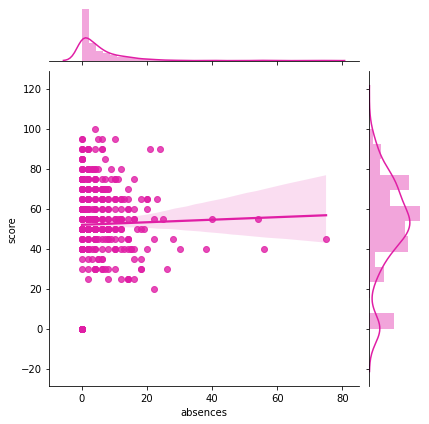

In [262]:
plot = sns.jointplot(x='absences', y='score', data=students, kind='reg', color='#E01EA5') 

подкорректируем два исключения для 385 и 212 дней:

In [257]:
students[students.score == 85].absences.value_counts()

0      4
7      1
385    1
Name: absences, dtype: int64

In [258]:
students[students.score == 45].absences.value_counts()

4      5
0      4
14     3
2      3
8      2
28     1
22     1
212    1
12     1
75     1
10     1
9      1
7      1
6      1
5      1
Name: absences, dtype: int64

In [259]:
students.absences.loc[students[students.absences == 385].absences.index] = 0

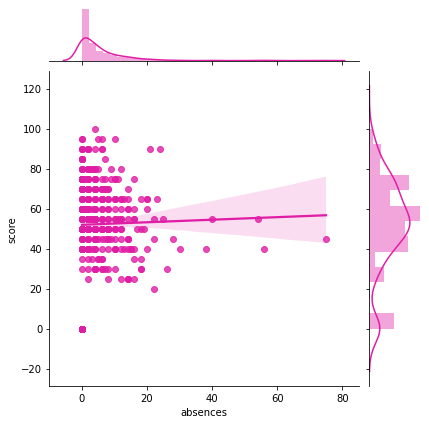

In [263]:
plot = sns.jointplot(x='absences', y='score', data=students, kind='reg', color='#E01EA5') 

In [264]:
np.corrcoef(students.absences, students.score)

array([[1.      , 0.022393],
       [0.022393, 1.      ]])

## Промежуточные выводы:

    - незначительная прямая ависимость, хотя много индивидуальных значений, например 20 дней пропуска и оценка 65, а при 21 дне пропуска оценка - 90. Я бы удалила этот столбец но вопрос к школе от чего дети не пропускают занятия, а оценки всё равно низкие?!

## Итоговые выводы:
- список столбцов которые будут использованы для последущего анализа:


In [265]:
students.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   school_name            389 non-null    object
 1   gender                 389 non-null    object
 2   age                    389 non-null    int64 
 3   address                389 non-null    object
 4   mother_edu             389 non-null    int64 
 5   father_edu             389 non-null    int64 
 6   mother_job             389 non-null    object
 7   father_job             389 non-null    object
 8   guardian               389 non-null    object
 9   travel_time            389 non-null    int64 
 10  study_time             389 non-null    int64 
 11  failures               389 non-null    int64 
 12  add_sch_support        389 non-null    object
 13  family_support         389 non-null    object
 14  paid                   389 non-null    object
 15  add_school_activities  

### Признаки которые негативно влияют на успеваемость по математике:
- уровень здоровья
- проведение времени с друзьями
- романтические отношения
- допонительная образовательная поддержка (не работает)
- количество внеучебных неудач (ярко)
- время в пути до школы
- работа матери (еслт не работает)

    

### Признаки которые позитивно влияют на успеваемость по математике:
- количество пропущенных занятий (незначительно)
- свободное время
- семейные отношения (незначительно)
- наличие интернета в доме
- желание продолжить учёбу
- посещение детского сада (незначительно)
- дополнительные внеучебные занятия (незначительно)
- дополнительные платные занятия (незначительно)
- семейная образовательная поддержка
- время на учёбу в неделю
- опекун
- причина выбора школы
- профессия отца (если учитель)
- профессия матери (если в здравоохранении)
- образование отца (незначительно)
- отбарозание матери (ярко)
- пол студента
- какая именно школа